# Developer Salary Prediction - Data Cleaning and EDA

This notebook is the first step of our capstone project using the Stack Overflow Developer Survey 2024 data.  
In this phase, we will:
- Load the raw dataset
- Clean and preprocess the data
- Explore important variables related to developer salaries
- Prepare the dataset for modeling in the next stage

We will focus on the following features:
- `ConvertedCompYearly` (Target variable: Salary)
- `EdLevel` (Education level)
- `YearsCodePro` (Years of professional experience)
- `Country` (Location)
- `DevType` (Developer role)

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for cleaner visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## Step 1: Load the Dataset

We begin by importing the Stack Overflow Developer Survey 2024 dataset.  
This dataset contains responses from developers around the world, including their salary, education level, professional experience, country, and developer role.

We'll load the file and inspect its structure.

In [2]:
# Load the survey data
df = pd.read_csv('survey_results_public.csv')

# View shape and first few rows
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Top 10 Countries by Median Developer Salary

We will now visualize the top 10 countries with the **highest median developer salaries** in our cleaned dataset.

Note: 
- We’re using **median** instead of mean to reduce the effect of outliers.
- We'll ensure we filter out any countries with very few responses to avoid misleading results.

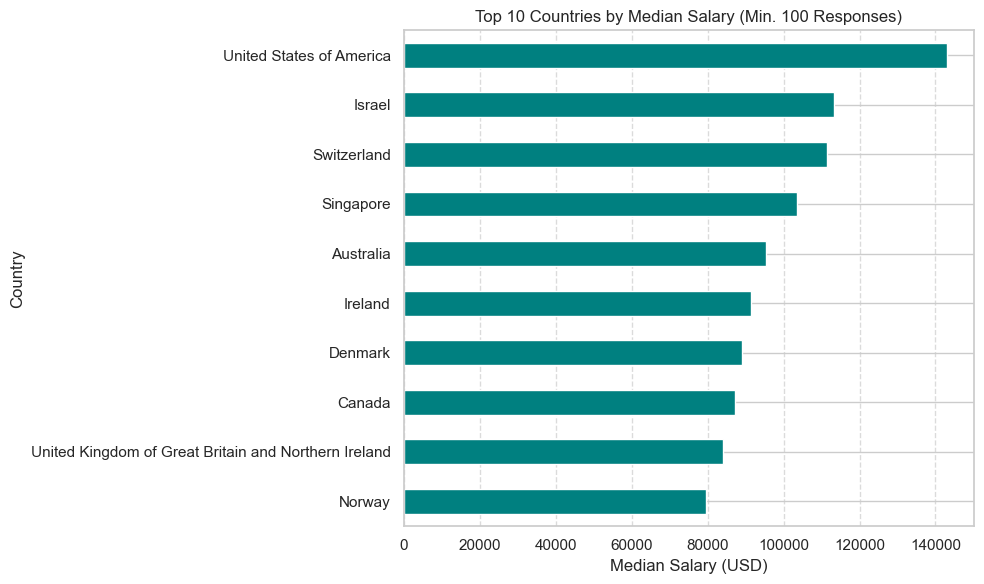

In [3]:
# Filter out countries with < 100 responses
country_counts = df['Country'].value_counts()
valid_countries = country_counts[country_counts >= 100].index
filtered_df = df[df['Country'].isin(valid_countries)]

# Calculate and plot top 10 median salaries
top_10 = filtered_df.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False).head(10)

top_10.sort_values().plot(kind='barh', color='teal', figsize=(10, 6))
plt.title('Top 10 Countries by Median Salary (Min. 100 Responses)')
plt.xlabel('Median Salary (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 2: Filter Data for United States

To focus our analysis and reduce variability, we’ll filter the dataset to include only responses from the **United States**.

This ensures salary comparisons are made within a consistent economic and labor market context.

In [4]:
# Show top 10 countries by number of entries
top_10_countries = df['Country'].value_counts().head(10)
print(top_10_countries)

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Name: count, dtype: int64


In [5]:
print(df['Country'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [6]:
# Filter to include only U.S. respondents
df = df[df['Country'] == 'United States of America'].copy()

# Confirm it's working
print("Dataset shape after country filter:", df.shape)
print("Remaining countries:", df['Country'].unique())

Dataset shape after country filter: (11095, 114)
Remaining countries: ['United States of America']


## Step 3: Select Relevant Columns

To simplify our analysis and modeling process, we'll keep only the columns that are directly related to our project goal: predicting salary.

The features we’ll keep:
- `ConvertedCompYearly` – our target variable (developer's yearly salary)
- `EdLevel` – education level
- `YearsCodePro` – years of professional experience
- `Country` – country of employment
- `DevType` – developer’s role or job type

In [7]:
# Keep only the columns we need
columns_of_interest = [
    'ConvertedCompYearly',  # Target variable
    'EdLevel',              # Education level
    'YearsCodePro',         # Professional experience
    'DevType'               # Developer job role
]

df = df[columns_of_interest]
df.head()

,ConvertedCompYearly,EdLevel,YearsCodePro,DevType
0,NaN,Primary/elementary school,NaN,NaN
5,NaN,Primary/elementary school,NaN,Student
6,NaN,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",7,Academic researcher
10,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Project manager
12,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Developer, back-end"


## Step 4: Handle Missing Values

Real-world datasets often contain missing or incomplete entries, and the Stack Overflow survey is no exception.  
To ensure our analysis and models are accurate, we’ll first identify any missing values, then drop rows where key fields are empty.

Later, we can consider more advanced handling like imputation, but for now, we’ll focus on a clean and minimal dataset.

In [8]:
# Check how many missing values exist in each column
df.isnull().sum()

ConvertedCompYearly    6418
EdLevel                   0
YearsCodePro           1523
DevType                 134
dtype: int64

In [9]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check new shape
df.shape

(4657, 4)

## Step 5: Convert 'YearsCodePro' to Numeric

The `YearsCodePro` column contains the number of years a respondent has been coding professionally.  
However, some entries are strings like "Less than 1 year" or "More than 50 years", which can't be used directly in numerical analysis.

We’ll convert this column to a numeric type and drop any rows that can’t be converted.

In [10]:
# Convert text to numbers; invalid entries become NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where conversion failed
df.dropna(subset=['YearsCodePro'], inplace=True)

# Check result
df['YearsCodePro'].describe()

count    4566.000000
mean       12.824573
std         9.851165
min         1.000000
25%         5.000000
50%        10.000000
75%        18.000000
max        50.000000
Name: YearsCodePro, dtype: float64

In [11]:
df.columns.tolist()

['ConvertedCompYearly', 'EdLevel', 'YearsCodePro', 'DevType']

## Step 6: Feature Engineering – Managerial Role

We will add one custom feature:
- `HasManagerRole`: True if the developer's role includes keywords like "manager", "lead", or "architect"

These roles often correlate with higher salaries.

In [12]:
# Flag if respondent has a managerial/leadership role
df['HasManagerRole'] = df['DevType'].fillna('').apply(
    lambda x: any(role in x.lower() for role in ['manager', 'lead', 'architect'])
)

# Preview the new column
df[['DevType', 'HasManagerRole']].head()

,DevType,HasManagerRole
389,Student,False
398,"Developer, full-stack",False
428,"Engineer, site reliability",False
431,"Developer, full-stack",False
432,"Developer, full-stack",False


## Step 7: Exploratory Data Analysis (EDA)

In this step, we explore the cleaned and enhanced dataset to understand trends and relationships.

We will:
- Examine basic summary statistics
- Explore the correlation between numerical features
- Visualize salary distributions by country and managerial role

In [13]:
# Show general statistics for numeric columns
df.describe()

,ConvertedCompYearly,YearsCodePro
count,4.566000e+03,4566.000000
mean,1.627957e+05,12.824573
std,1.101506e+05,9.851165
min,1.000000e+00,1.000000
25%,1.050000e+05,5.000000
50%,1.450000e+05,10.000000
75%,1.900000e+05,18.000000
max,1.900000e+06,50.000000


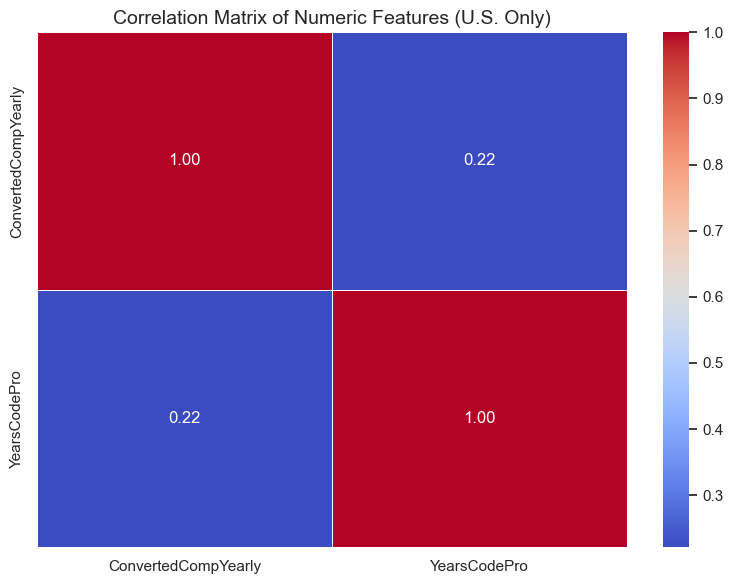

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_df = df.select_dtypes(include=['number'])

# Remove rows with missing values (to avoid skewed correlation)
numeric_df_cleaned = numeric_df.dropna()

# Compute correlation matrix
correlation_matrix = numeric_df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features (U.S. Only)", fontsize=14)
plt.tight_layout()
plt.show()

**Correlation Analysis of Numeric Features**

We conducted a correlation analysis on the numeric variables in the dataset to assess the strength of linear relationships with the target variable, `ConvertedCompYearly`. The primary goal was to identify whether any single numeric feature could serve as a strong predictor of salary.

The analysis revealed that `YearsCodePro`, which represents the number of years of professional coding experience, has a correlation coefficient of approximately 0.22 with annual salary. This suggests a weak positive linear relationship—salaries tend to increase with experience, but the trend is not strong enough to serve as a sole predictor.

These results are consistent with real-world compensation data, where salary is influenced by multiple interdependent factors such as job type, education level, management responsibility, industry, and company size. A low correlation does not imply that a variable is unimportant, but rather that its influence may not be captured effectively through a simple linear relationship.

Given this, it is important to incorporate categorical variables and consider non-linear models in future steps. Additionally, feature engineering techniques such as binning or creating interaction terms may help better capture underlying patterns and improve model performance.

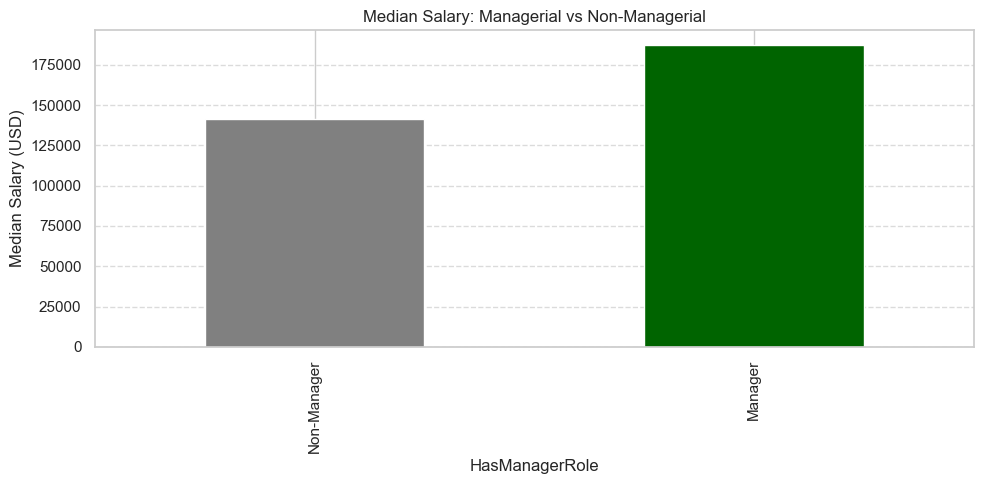

In [15]:
# Compare median salary for managerial vs non-managerial roles
df.groupby('HasManagerRole')['ConvertedCompYearly'].median().plot(kind='bar', color=['gray', 'darkgreen'])
plt.title("Median Salary: Managerial vs Non-Managerial")
plt.ylabel("Median Salary (USD)")
plt.xticks([0, 1], ['Non-Manager', 'Manager'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 8: Encode Categorical Variables

To prepare the dataset for machine learning models, we must convert categorical variables into numeric format. We will use one-hot encoding for this purpose, which creates binary columns for each category level.

Only selected categorical features that are likely to influence salary will be encoded. These include:
- EdLevel (education level)
- DevType (developer role)
- HasManagerRole (whether the respondent holds a managerial position)

We exclude the Country column since the dataset has already been filtered to include only respondents from the United States.

In [16]:
# Confirm current columns
print(df.columns)

# One-hot encode selected categorical variables
categorical_columns = ['EdLevel', 'DevType', 'HasManagerRole']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check new shape and encoded columns
print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()

Index(['ConvertedCompYearly', 'EdLevel', 'YearsCodePro', 'DevType',
       'HasManagerRole'],
      dtype='object')
Encoded dataset shape: (4566, 43)


,ConvertedCompYearly,YearsCodePro,"EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)","EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,EdLevel_Something else,DevType_Blockchain,...,DevType_Other (please specify):,DevType_Product manager,DevType_Project manager,DevType_Research & Development role,DevType_Scientist,DevType_Security professional,"DevType_Senior Executive (C-Suite, VP, etc.)",DevType_Student,DevType_System administrator,HasManagerRole_True
389,110000.0,7.0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
398,195000.0,30.0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
428,230000.0,11.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
431,85000.0,23.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
432,160000.0,18.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Step 8: Remove Outliers in Annual Salary

Survey-based salary data often includes extreme outliers due to reporting errors or a small number of unusually high-earning individuals. These values can disproportionately affect model performance.

To mitigate this, we will remove rows where the annual salary (`ConvertedCompYearly`) falls outside the 1st and 99th percentiles. This retains the central 98% of the data and helps stabilize model training without discarding too much information.

In [17]:
# Set the salary column
salary_col = 'ConvertedCompYearly'

# Define lower and upper percentile thresholds
lower_bound = df[salary_col].quantile(0.01)
upper_bound = df[salary_col].quantile(0.99)

# Filter the DataFrame to remove outliers
df = df[(df[salary_col] >= lower_bound) & (df[salary_col] <= upper_bound)].copy()

# Confirm the new shape and range
print("Filtered dataset shape:", df.shape)
print(f"Salary range after outlier removal: ${df[salary_col].min():,.0f} - ${df[salary_col].max():,.0f}")

Filtered dataset shape: (4476, 5)
Salary range after outlier removal: $18,500 - $600,000


## Step 9: Train-Test Split

We now split the cleaned and preprocessed dataset into training and testing sets. The training set will be used to fit the model, while the test set will be held out to evaluate model performance on unseen data.

The target variable for prediction is `ConvertedCompYearly`, representing the respondent's annual salary in U.S. dollars. All other features will be used as predictors.

We will use an 80/20 split to ensure enough data is available for training while retaining a robust testing sample.

In [19]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'ConvertedCompYearly'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3652, 42)
Testing set shape: (914, 42)


## Step 10: Baseline Model – Linear Regression

We begin with a basic linear regression model to establish a performance baseline. Linear regression assumes a linear relationship between the features and the target variable (`ConvertedCompYearly`).

After fitting the model, we evaluate it using:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score (coefficient of determination)

These metrics give us insight into the model's accuracy and explainability.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Results:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Results:
MAE: $58,488.03
RMSE: $104,924.73
R² Score: 0.1361


## Step 11: Linear Regression Model Results

A baseline linear regression model was trained on the processed dataset, using `ConvertedCompYearly` as the target variable and all encoded features as predictors. The model's performance was evaluated on the test set using three standard regression metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and the R² score.

The results are as follows:

- **MAE**: $58,488.03
       
- **RMSE**: $104,924.73
    
- **R² Score**: 0.1361    

These results indicate that the linear regression model captures only a modest portion of the variation in annual salary. An R² score of 0.1361 suggests that approximately 13.6% of the variability in salary can be explained by the model's features. Both the MAE and RMSE highlight substantial error margins, reflecting the inherent complexity and noise in self-reported salary data.

While this model provides a useful baseline, it is likely limited by the linearity assumption and the absence of interaction or non-linear terms. In subsequent steps, we will explore more advanced models such as Random Forest or Gradient Boosting, which are better suited for capturing complex relationships within the data.

## Step 12: Advanced Modeling and Evaluation

To improve upon the baseline linear regression model, we now train two additional machine learning models:

- **Random Forest Regressor** – an ensemble-based method that captures complex, non-linear interactions between features using multiple decision trees.
- **XGBoost Regressor** – an optimized gradient boosting framework known for its speed and performance in predictive modeling tasks.

Both models are well-suited to handle the multi-dimensional and partially non-linear structure of the dataset.

We will evaluate their performance using the same metrics as before (MAE, RMSE, and R²), compare their results to the baseline model, and plot predicted versus actual salary values to visually assess fit.

Finally, we will store all performance metrics for future reporting and documentation.

In [21]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
y_rf = rf_model.predict(X_test)
y_xgb = xgb_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\nMAE: ${mae:,.2f}\nRMSE: ${rmse:,.2f}\nR² Score: {r2:.4f}\n")
    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}

# Evaluate all
results = []
results.append(evaluate_model("Linear Regression", y_test, y_pred))  # from previous step
results.append(evaluate_model("Random Forest", y_test, y_rf))
results.append(evaluate_model("XGBoost", y_test, y_xgb))

# Save to dataframe for reporting
results_df = pd.DataFrame(results)
results_df

Linear Regression:
MAE: $58,488.03
RMSE: $104,924.73
R² Score: 0.1361

Random Forest:
MAE: $64,518.19
RMSE: $115,348.23
R² Score: -0.0440

XGBoost:
MAE: $59,957.15
RMSE: $109,875.89
R² Score: 0.0527



,Model,MAE,RMSE,R2
0,Linear Regression,58488.031980,104924.731971,0.136130
1,Random Forest,64518.194242,115348.233485,-0.044034
2,XGBoost,59957.145348,109875.889639,0.052678


## Step 12-A: Predicted vs Actual Salaries

The following plot compares predicted and actual salaries for the XGBoost model. Ideally, points should align closely with the diagonal reference line. Significant deviations indicate areas where the model underperforms or overestimates.

This visual check complements our numerical evaluation metrics and helps identify bias or variance patterns in predictions.

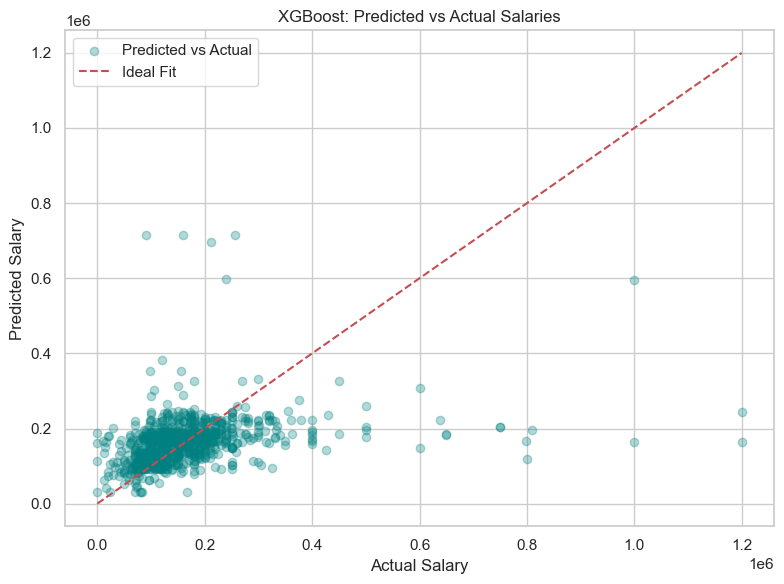

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_xgb, alpha=0.3, color='teal', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("XGBoost: Predicted vs Actual Salaries")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 12-B: Feature Importance (XGBoost)

Tree-based models such as XGBoost and Random Forest allow us to extract feature importance scores. These scores reflect how much each feature contributed to reducing error during model training.

Understanding feature importance helps interpret the model and can guide future feature selection or engineering.

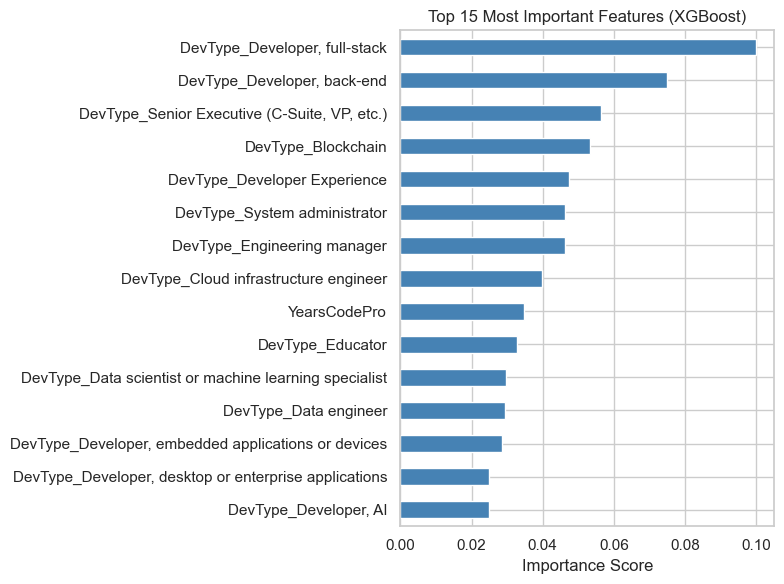

In [23]:
importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=True).tail(15)  # Top 15

# Plot
plt.figure(figsize=(8, 6))
importances.plot(kind='barh', color='steelblue')
plt.title("Top 15 Most Important Features (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

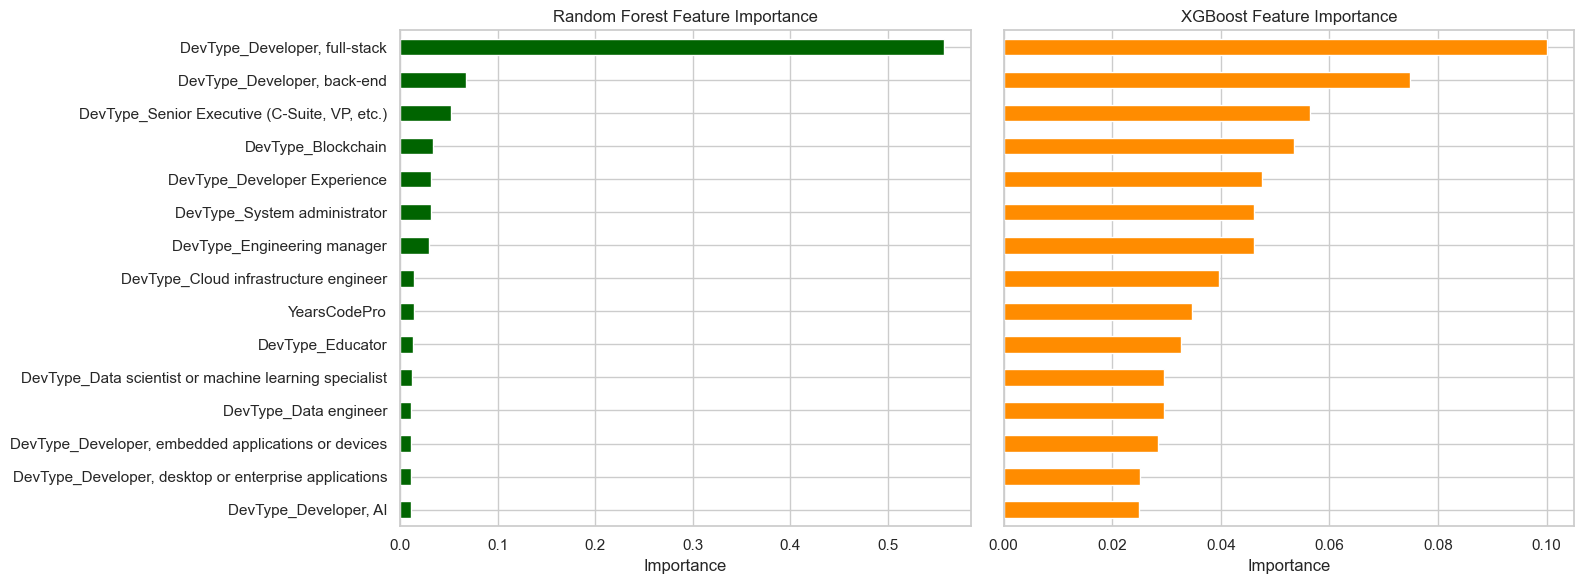

In [25]:
# Get top features from Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_top = rf_importances.sort_values(ascending=True).tail(15)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

rf_top.plot(kind='barh', ax=axes[0], color='darkgreen')
axes[0].set_title("Random Forest Feature Importance")
axes[0].set_xlabel("Importance")

xgb_top = importances  # From earlier: XGBoost importances
xgb_top.plot(kind='barh', ax=axes[1], color='darkorange')
axes[1].set_title("XGBoost Feature Importance")
axes[1].set_xlabel("Importance")

plt.tight_layout()
plt.show()

In [26]:
# Save model evaluation results
results_df.to_csv("model_comparison_results.csv", index=False)

## Step 13: Hyperparameter Tuning

To improve model performance, we apply hyperparameter tuning using `GridSearchCV` on both Random Forest and XGBoost regressors. This process helps identify the best combination of parameters by evaluating performance across multiple configurations using cross-validation.

The best model configurations are then evaluated on the test set to compare against the baseline results.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],        # Number of trees
    'max_depth': [None, 10, 20],       # Max depth of each tree
    'min_samples_split': [2, 5]        # Minimum samples to split an internal node
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                             # 3-fold cross-validation
    scoring='r2',                     # Optimize for R²
    n_jobs=-1,                        # Use all cores
    verbose=2                         # Print progress
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Random Forest Parameters:", grid_search.best_params_)
print("Best Cross-Validated R² Score:", grid_search.best_score_)

# Predict on test set using best model
y_pred_rf_tuned = grid_search.best_estimator_.predict(X_test)

# Evaluate
print("Test Set R² Score:", r2_score(y_test, y_pred_rf_tuned))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validated R² Score: 0.033780921577026835
Test Set R² Score: 0.03264138543789563


## Step 14: Hyperparameter Tuning for XGBoost

We used **GridSearchCV** to optimize hyperparameters for the **XGBoost Regressor**. The parameters tuned include:
- `n_estimators` (number of trees)
- `learning_rate` (rate of improvement)
- `max_depth` (depth of trees)
- `subsample` (fraction of samples used)

After tuning, we evaluated the model on the test set using:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
}

# Initialize base model
xgb = XGBRegressor(random_state=42, verbosity=0)

# Set up GridSearchCV
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=3,                     # 3-fold cross-validation
    scoring='r2',             # Optimize for R²
    n_jobs=-1,
    verbose=2
)

# Fit on training data
xgb_grid_search.fit(X_train, y_train)

# Print best parameters and R² score
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)
print("Best Cross-Validated R² Score:", xgb_grid_search.best_score_)

# Predict on test data
y_pred_xgb_tuned = xgb_grid_search.best_estimator_.predict(X_test)

# Final evaluation
mae = mean_absolute_error(y_test, y_pred_xgb_tuned)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
r2 = r2_score(y_test, y_pred_xgb_tuned)

print(f"\nTuned XGBoost Test Set Results:\nMAE: ${mae:,.2f}\nRMSE: ${rmse:,.2f}\nR² Score: {r2:.4f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validated R² Score: 0.12095713065348701

Tuned XGBoost Test Set Results:
MAE: $57,444.50
RMSE: $104,567.81
R² Score: 0.1420


In [29]:
import pandas as pd

# Save full grid search results
cv_results_df = pd.DataFrame(xgb_grid_search.cv_results_)
cv_results_df.to_csv("xgboost_gridsearch_results.csv", index=False)